In [17]:
from __future__ import division
import numpy
import pandas
import matplotlib.pyplot as plt
from numpy import matrix, linalg, linspace, interp, asarray, argmax
from scipy.integrate import odeint
from scipy.stats import linregress 
%matplotlib inline

<img src="tukkies.png" width="150" />

100 minutes

The aerobic metabolism of Actinobacillus ethenonicum is given below as cmol map.

<img src="actinobacillus.png" width="450" />

Apart from $CO_2$ the only catabolite formed is ethenone ($C_2H_2O$).

The following physical properties are known:

|$\alpha \qquad \qquad$|$\mu_{max} \qquad$|$\theta_{max}\qquad$| $Biomass$ $\qquad \qquad$
|----|-|-|-|-
|$\frac{cmol\,CO_2}{cmol \, X}$|$\frac{1}{h}$|$\frac{mol \, ATP}{cmol\,X\cdot h}$|$X$
|0.05|0.25|0.08|$CH_{1.92}O_{0.63}N_{0.25}$



In [18]:
MMx = 27.5 #kg/kmol
alpha = 0.05
mumax = 0.25
thetamax = 0.08

1.) Determine the value of $x$ (see map). Use a minus sign if NADH is consumed (arrow inwards). [3]


On the stream after pyruvate, before the split to $CO_2$, we know 1NADH is produced or 1/3NADH per cmol pyruvate. After the split on the ethenone stream, the 1NADH is divided by the 2 carbons of ethenone to convert it to per cmol Ethenone. Hence the answer is x = +0.5NADH/(cmol Ethenone)


2.) Determine the value of $\beta$. [3]

In [19]:
DOR = numpy.matrix([[-1, 0, 1, 1, 0],
                   [-4, 0, 3.91, 0, 2],
                   [0, -1, 0.25, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0]])

C = numpy.matrix([0, 0, 0, 1, alpha]).T

DORrates = numpy.linalg.solve(DOR,C)

Beta = DORrates[4,0]

Beta

0.14499999999999993

3.)Note that 3 equations of the flux model are supplies in hidden format (ST2_mod.xlsx) where the third row represents the ATP balance (that is equal to $\theta$). What is the value of $\gamma$ in $\frac{mol \, ATP}{Cmol \, X}$? [3]

In [20]:
def response_Q3(C):
    Cx, Cs, Cet, Cox = C[0], C[1], C[2], C[3]
    
    S = numpy.matrix(pandas.read_excel('ST2_mod.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0]])
    K = numpy.matrix([0,0, thetamax, mumax]).T
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Ethenone
            r[3,0]]      #Oxygen consumption

In [21]:
Cxo = 0
Cso = 1
Co = [Cxo, Cso, 0, 0]

rates_Q3 = response_Q3(Co)

rx = rates_Q3[0]
rs = -rates_Q3[1]
ret = rates_Q3[2]
rox = rates_Q3[3]

rates_Q3

[0.25, -0.7223437500000001, 0.3065625, 0.17140625]

Just solve for gamma on ATP balance:

$$-\gamma{r_1} + 0.5r_2 + 3r_3 = \theta$$

Remember the 1/3ATP per cmol Pyruvate is equivalent to 1/2ATP per cmol Ethenone.


In [22]:
gamma = ((1/2)*ret + 3*rox - thetamax)/rx
gamma

2.3500000000000005

4.) What is the rate of $O_2$ consumption in $\frac{mol}{Cmol \, X.h}$ if both $\mu$ and $\theta$ is at a maximum? [2]

Just read it from the response_fun returns

In [23]:
rox

0.17140625

5.) What is the rate of $CO_2$ production in $\frac{mol}{Cmol \, X.h}$  if both $\mu$ and $\theta$ is at a maximum? [2]

$CO_2$ balance is determined by:

$$CO_2{(Total)} = \alpha{r_1} + 2r_2$$

In [24]:
rco2 = alpha*rx + (1/2)*ret
rco2

0.16578125000000002

6.) Is anaerobic operation possible for the organism? Explain your answer. [2]


No. Ethenone is produced as part of respiration where NADH is released. If no NADH is released, no Ethenone can be produced.





A batch fermenter run is performed. The initial glucose concentration is $120 g/L$ while the initial biomass concentration is $0.002\frac{cmol\,X}{L}$.  The Monod constant for both growth and maintenance is given by $0.0003\frac{cmol}{L}$. The growth rate is inhibited by ethenone ($C_E$) according to the following relationship:

$$\mu = \mu_{max}(1 - 0.42C_E^{2})$$



7.) Do the following question without performing integration. If the value of $r_o$ is $0.1\frac{mol\,O_2}{Cmol \, X.h}$ what will be the value of $C_E$($\frac{cmol}{L}$) in the fermenter. [3]

In [25]:
Cso, Cxo, Km = 120/30, 0.002, 0.0003

In [26]:
def response_Q7(C):
    Cx, Cs, Cet, Cox = C[0], C[1], C[2], C[3]
    
    mu1 = mumax*(1 - 0.42*(Cet**2))
    theta = thetamax*(Cs/(Km + Cs))
    
    if mu1 < 0.0001:
        mu=0
    else:
        mu=mu1
    
    S = numpy.matrix(pandas.read_excel('ST2_mod.xlsx'))
    S1 = numpy.vstack([S,[0,0,0,1]])
    K = numpy.matrix([0,0, theta, 0.1]).T
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Ethenone
            r[3,0]]      #Oxygen consumption

In [29]:
Co7 = (Cxo, Cso, 0 ,0)
rates7 = response_Q7(Co7)
rates7[0]

0.13209741983489526


Now solve for $C_E$ using the given equation


In [32]:
Ce7 = ((1 - (rates7[0]/mumax))/0.42)**(1/2)
Ce7

1.0596611325599048

8.) At what time does growth terminate? Give answers in hours. [3]

In [71]:
def response_Q8(C):
    Cx, Cs, Cet, Cox = C[0], C[1], C[2], C[3]
    
    mu1 = mumax*(1 - 0.42*(Cet**2))
    theta = thetamax*(Cs/(Km + Cs))
    
    if mu1 < 0.0001:
        mu=0
    else:
        mu=mu1
    
    S = numpy.matrix(pandas.read_excel('ST2_mod.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0]])
    K = numpy.matrix([0,0, theta, mu]).T
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Ethenone
            r[3,0],      #Oxygen consumption
            theta]

In [47]:
def ferm_eq8(C,t):
        Cx, Cs, Cet, Cox = C[0], C[1], C[2], C[3]
        
        r = response_Q8([Cx, Cs, Cet, Cox])
                
        return [r[0]*Cx,
                r[1]*Cx,
                r[2]*Cx,
                r[3]*Cx]

In [62]:
Co8 = (Cxo, Cso, 0, 0)
tmax8 = 50
tspan8 = numpy.linspace(0,tmax8,500)

Ci8 = odeint(ferm_eq8, Co8, tspan8)

Cx8, Cs8, Cet8, Cox8 = Ci8.T

In [63]:
r8 = asarray([response_Q8(C) for C in Ci8])

rx8 = r8[:,0]
rs8 = -r8[:,1]
ret8 = r8[:,2]
rox8 = r8[:,3]

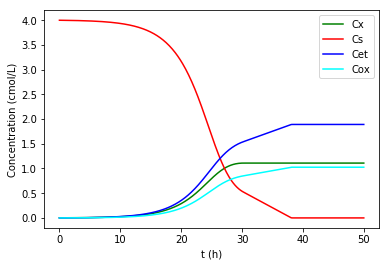

In [64]:
plt.figure(1)
plt.plot(tspan8, Cx8, color = 'green', label = 'Cx')
plt.plot(tspan8, Cs8, color = 'red', label = 'Cs')
plt.plot(tspan8, Cet8, color = 'blue', label = 'Cet')
plt.plot(tspan8, Cox8, color = 'cyan', label = 'Cox')
plt.xlabel('t (h)')
plt.ylabel('Concentration (cmol/L)')
plt.legend(loc='best')
#plt.grid()
plt.show()

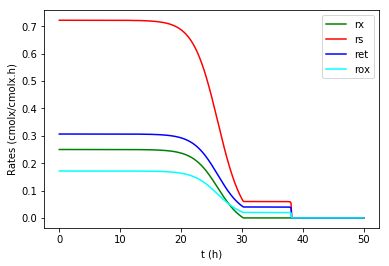

In [65]:
plt.figure(2)
plt.plot(tspan8, rx8, color = 'green', label = 'rx')
plt.plot(tspan8, rs8, color = 'red', label = 'rs')
plt.plot(tspan8, ret8, color = 'blue', label = 'ret')
plt.plot(tspan8, rox8, color = 'cyan', label = 'rox')
plt.xlabel('t (h)')
plt.ylabel('Rates (cmolx/cmolx.h)')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [66]:
growthend = interp(0.0001,rx8[::-1],tspan8[::-1])
growthend

30.251655003135106

9.) Plot the time dependent concentration profile of ethenone. [2]

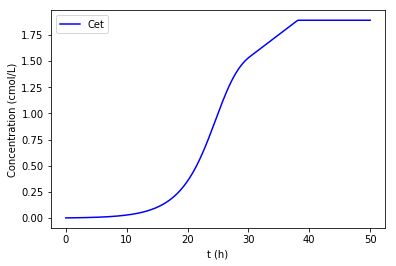

In [67]:
plt.figure(3)
plt.plot(tspan8, Cet8, color = 'blue', label = 'Cet')
plt.xlabel('t (h)')
plt.ylabel('Concentration (cmol/L)')
plt.legend(loc='best')
#plt.grid()
plt.show()

To get full marks for this question, there needs to be a change in concetration gradient before it reaches the maximum to show when growth is done.

10.) At what time in the fermentation is the volumetric consumption rate of oxygen at a maximum? Give answer in hours. [3]

In [68]:
rox8_v = rox8 * Cx8
rox8_vmax = argmax(rox8_v == max(rox8_v))
tmax = tspan8[rox8_vmax]
tmax

24.549098196392787

11.) At the time in question 10.), what fraction of glucose consumed is used to generate energy for growth? [3]

In [102]:
tspan11=numpy.linspace(0,tmax,500)           
Ci11 = odeint(ferm_eq8, Co8, tspan11)
C11 = Ci11[-1,:]
C11

array([0.74408194, 1.82858829, 0.92815045, 0.51787617])

In [103]:
rates11=response_Q8(C11)
rates11

[0.15954635736376052,
 -0.4826882884960512,
 0.21010974217606843,
 0.11662198199690685,
 0.07998687727391751]

In [104]:
def response_growth(C):
    Cx, Cs, Cet, Cox = C[0], C[1], C[2], C[3]
    
    mu1 = mumax*(1 - 0.42*(Cet**2))
    theta = thetamax*(Cs/(Km + Cs))
    
    if mu1 < 0.0001:
        mu=0
    else:
        mu=mu1
    
    S = numpy.matrix(pandas.read_excel('ST2_mod.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0]])
    K = numpy.matrix([0,0, 0, mu]).T
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Ethenone
            r[3,0],      #Oxygen consumption
            theta]

In [105]:
ratesG = response_growth(C11)
ratesG

[0.15954635736376052,
 -0.4226981305406131,
 0.1701163035391097,
 0.09662526267842747,
 0.07998687727391751]

In [106]:
GrowthFrac = ratesG[1]/rates11[1]
GrowthFrac

0.8757165661873545

12.) How will you improve the accumulated product yield (APY) of this fermentation without altering the initial glucose or biomass concentrations? Explain your reasoning. [3]

In [108]:
tdone = interp(0.001, Cs8[::-1],tspan8[::-1])
tdone

38.13195436780285

In [109]:
P12 = max(Cet8)/tdone*21
P12

1.0415995076012932

In [110]:
APY12 = max(Cet8)/Cso*21/30
APY12

0.33098520744482024